In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Conv2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Load the CSV file into a Pandas dataframe
df = pd.read_csv("C:/Users/Dell/University/Machine learning/heart.csv")


# Print the first 5 rows of the dataframe
print(df.head())
df

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [60]:
# Select the columns you want to encode
columns_to_encode = ["Sex", "ChestPainType", "RestingECG","ExerciseAngina","ST_Slope"]

# Loop over the selected columns and encode them
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(f"Label mapping for {column}:")
    for i, label in enumerate(le.classes_):
        print(f"{label} -> {i}")


Label mapping for Sex:
F -> 0
M -> 1
Label mapping for ChestPainType:
ASY -> 0
ATA -> 1
NAP -> 2
TA -> 3
Label mapping for RestingECG:
LVH -> 0
Normal -> 1
ST -> 2
Label mapping for ExerciseAngina:
N -> 0
Y -> 1
Label mapping for ST_Slope:
Down -> 0
Flat -> 1
Up -> 2


In [61]:
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [62]:
df.loc[ df['RestingBP'] <= 120, 'RestingBP'] = 0 #normal (0)
df.loc[(df['RestingBP'] > 120), 'RestingBP'] = 1 #abnormal (1)

In [63]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [64]:
# Calculate the correlation matrix for the dataframe
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.238874    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.036702    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.037041     0.067880   
RestingBP       0.238874  0.036702      -0.037041   1.000000     0.093052   
Cholesterol    -0.095282 -0.200092       0.067880   0.093052     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.067996    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.017798    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.064362     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.144826    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.146651     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.054056     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.089965    -0.232741   

<AxesSubplot:>

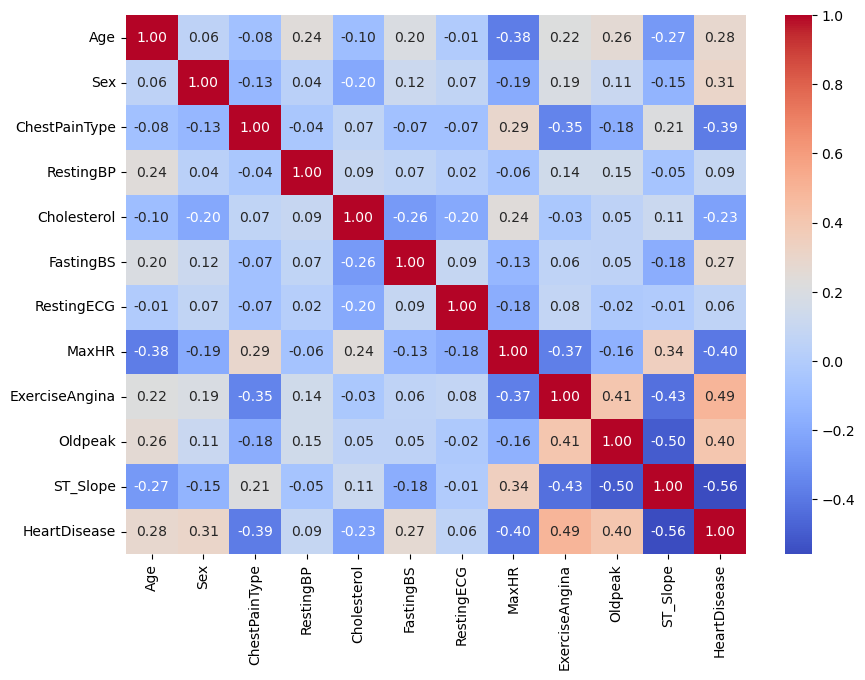

In [65]:
# Create a heatmap plot of the correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True,fmt='.2f',annot_kws={'size': 10})


Text(0.5, 1.0, 'Maximum six features affect the diseas')

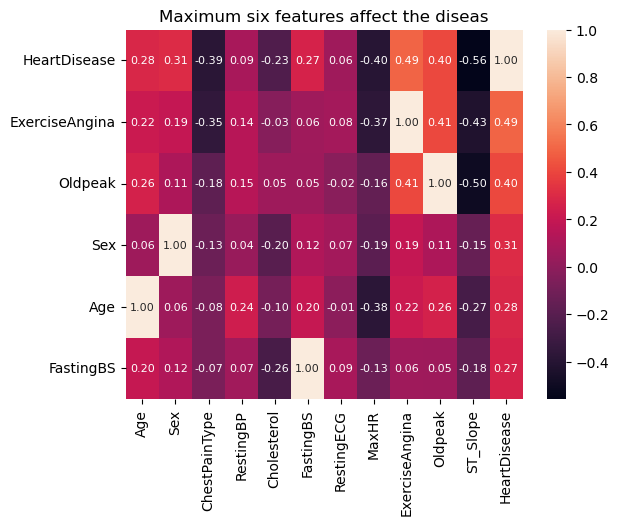

In [66]:
max_6_corr=correlation_matrix.nlargest(6,"HeartDisease")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8})
plt.title('Maximum six features affect the diseas')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

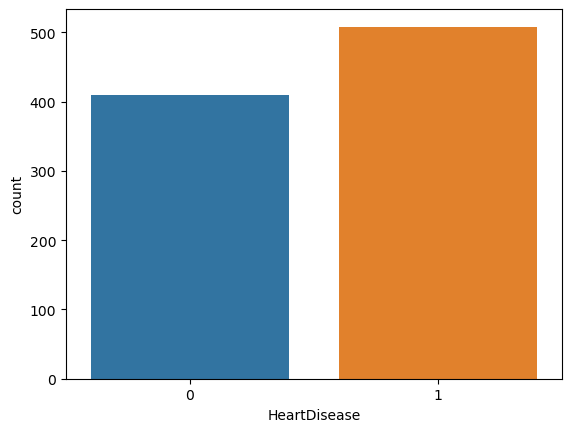

In [67]:
# Count the number of occurrences of each value in the target column
class_counts = df['HeartDisease'].value_counts()

# Create a bar plot of the class counts
sns.countplot(x='HeartDisease', data=df)


In [68]:
# get all columns except target
X=df.drop('HeartDisease',axis=1)
# target label only
y=df['HeartDisease']

X.shape,y.shape

((918, 11), (918,))

In [69]:
# split the data into train & test data 80:20% 
x_train,x_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2)

In [70]:
print("x train dimensions :",x_train.shape)
print("x test dimensions: ",x_test.shape)
print("y train dimensions :",y_train.shape)
print("y test dimensions :",y_test.shape)

x train dimensions : (734, 11)
x test dimensions:  (184, 11)
y train dimensions : (734,)
y test dimensions : (184,)


In [127]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(x_train, y_train)



RandomForestClassifier(n_estimators=150, random_state=42)

In [128]:
# evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.907608695652174


In [129]:
#evaluation_model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.907608695652174
Recall: 0.9099099099099099
Precision: 0.9351851851851852
F1_score: 0.9223744292237445


In [120]:

from sklearn.model_selection import cross_val_score


import numpy as np



In [ ]:
num_trees = [50, 100, 150, 200,250]

# Loop over the different numbers of trees and compute the cross-validation score to check the best number of trees
for n in num_trees:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X, y, cv=10)
    mean_score = np.mean(scores)
    print("Number of trees: {}".format(n))
    print("Mean accuracy score: {:.2f}".format(mean_score))

Number of trees: 50
Mean accuracy score: 0.84
Number of trees: 100
Mean accuracy score: 0.84
Number of trees: 150
Mean accuracy score: 0.84
